In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           roc_auc_score, confusion_matrix, classification_report, roc_curve)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
import shap

In [ ]:
data = pd.read_csv(r'D:\pycharmproject\kaggle\credit\data\BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# 删除不相关的列
data = data.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])

In [4]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


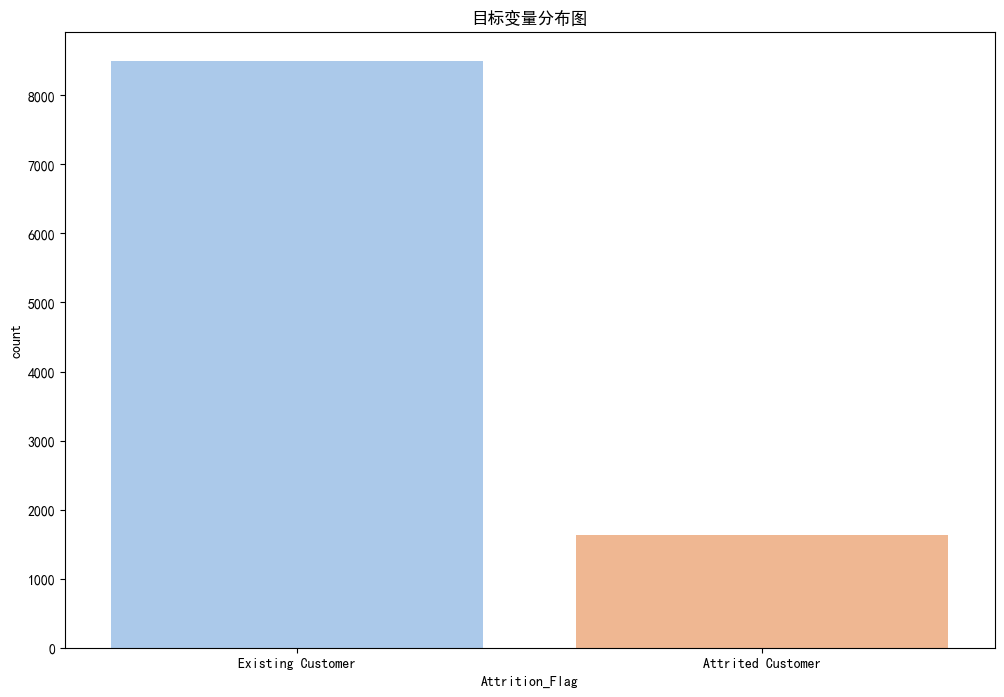

In [7]:
# 可视化目标变量
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='Attrition_Flag', palette='pastel')
ax.set_title('目标变量分布图')
plt.show()

In [8]:
Existing_num = data['Attrition_Flag'].value_counts()[0]
Attrited_num = data['Attrition_Flag'].value_counts()[1]
print(f'流失比率为{(Attrited_num/data.shape[0])*100}')

流失比率为16.065962279055988


# 探索性数据分析
## 单变量分析

In [9]:
num_col = [i for i in data.columns if len(data[i].unique())>10]
cat_col = [i for i in data.columns if len(data[i].unique())<10]
print(f'分类变量有{len(cat_col)}个，数值变量有{len(num_col)}个')

分类变量有10个，数值变量有10个


C:\Users\79250\AppData\Local\Temp\ipykernel_14580\2447985060.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


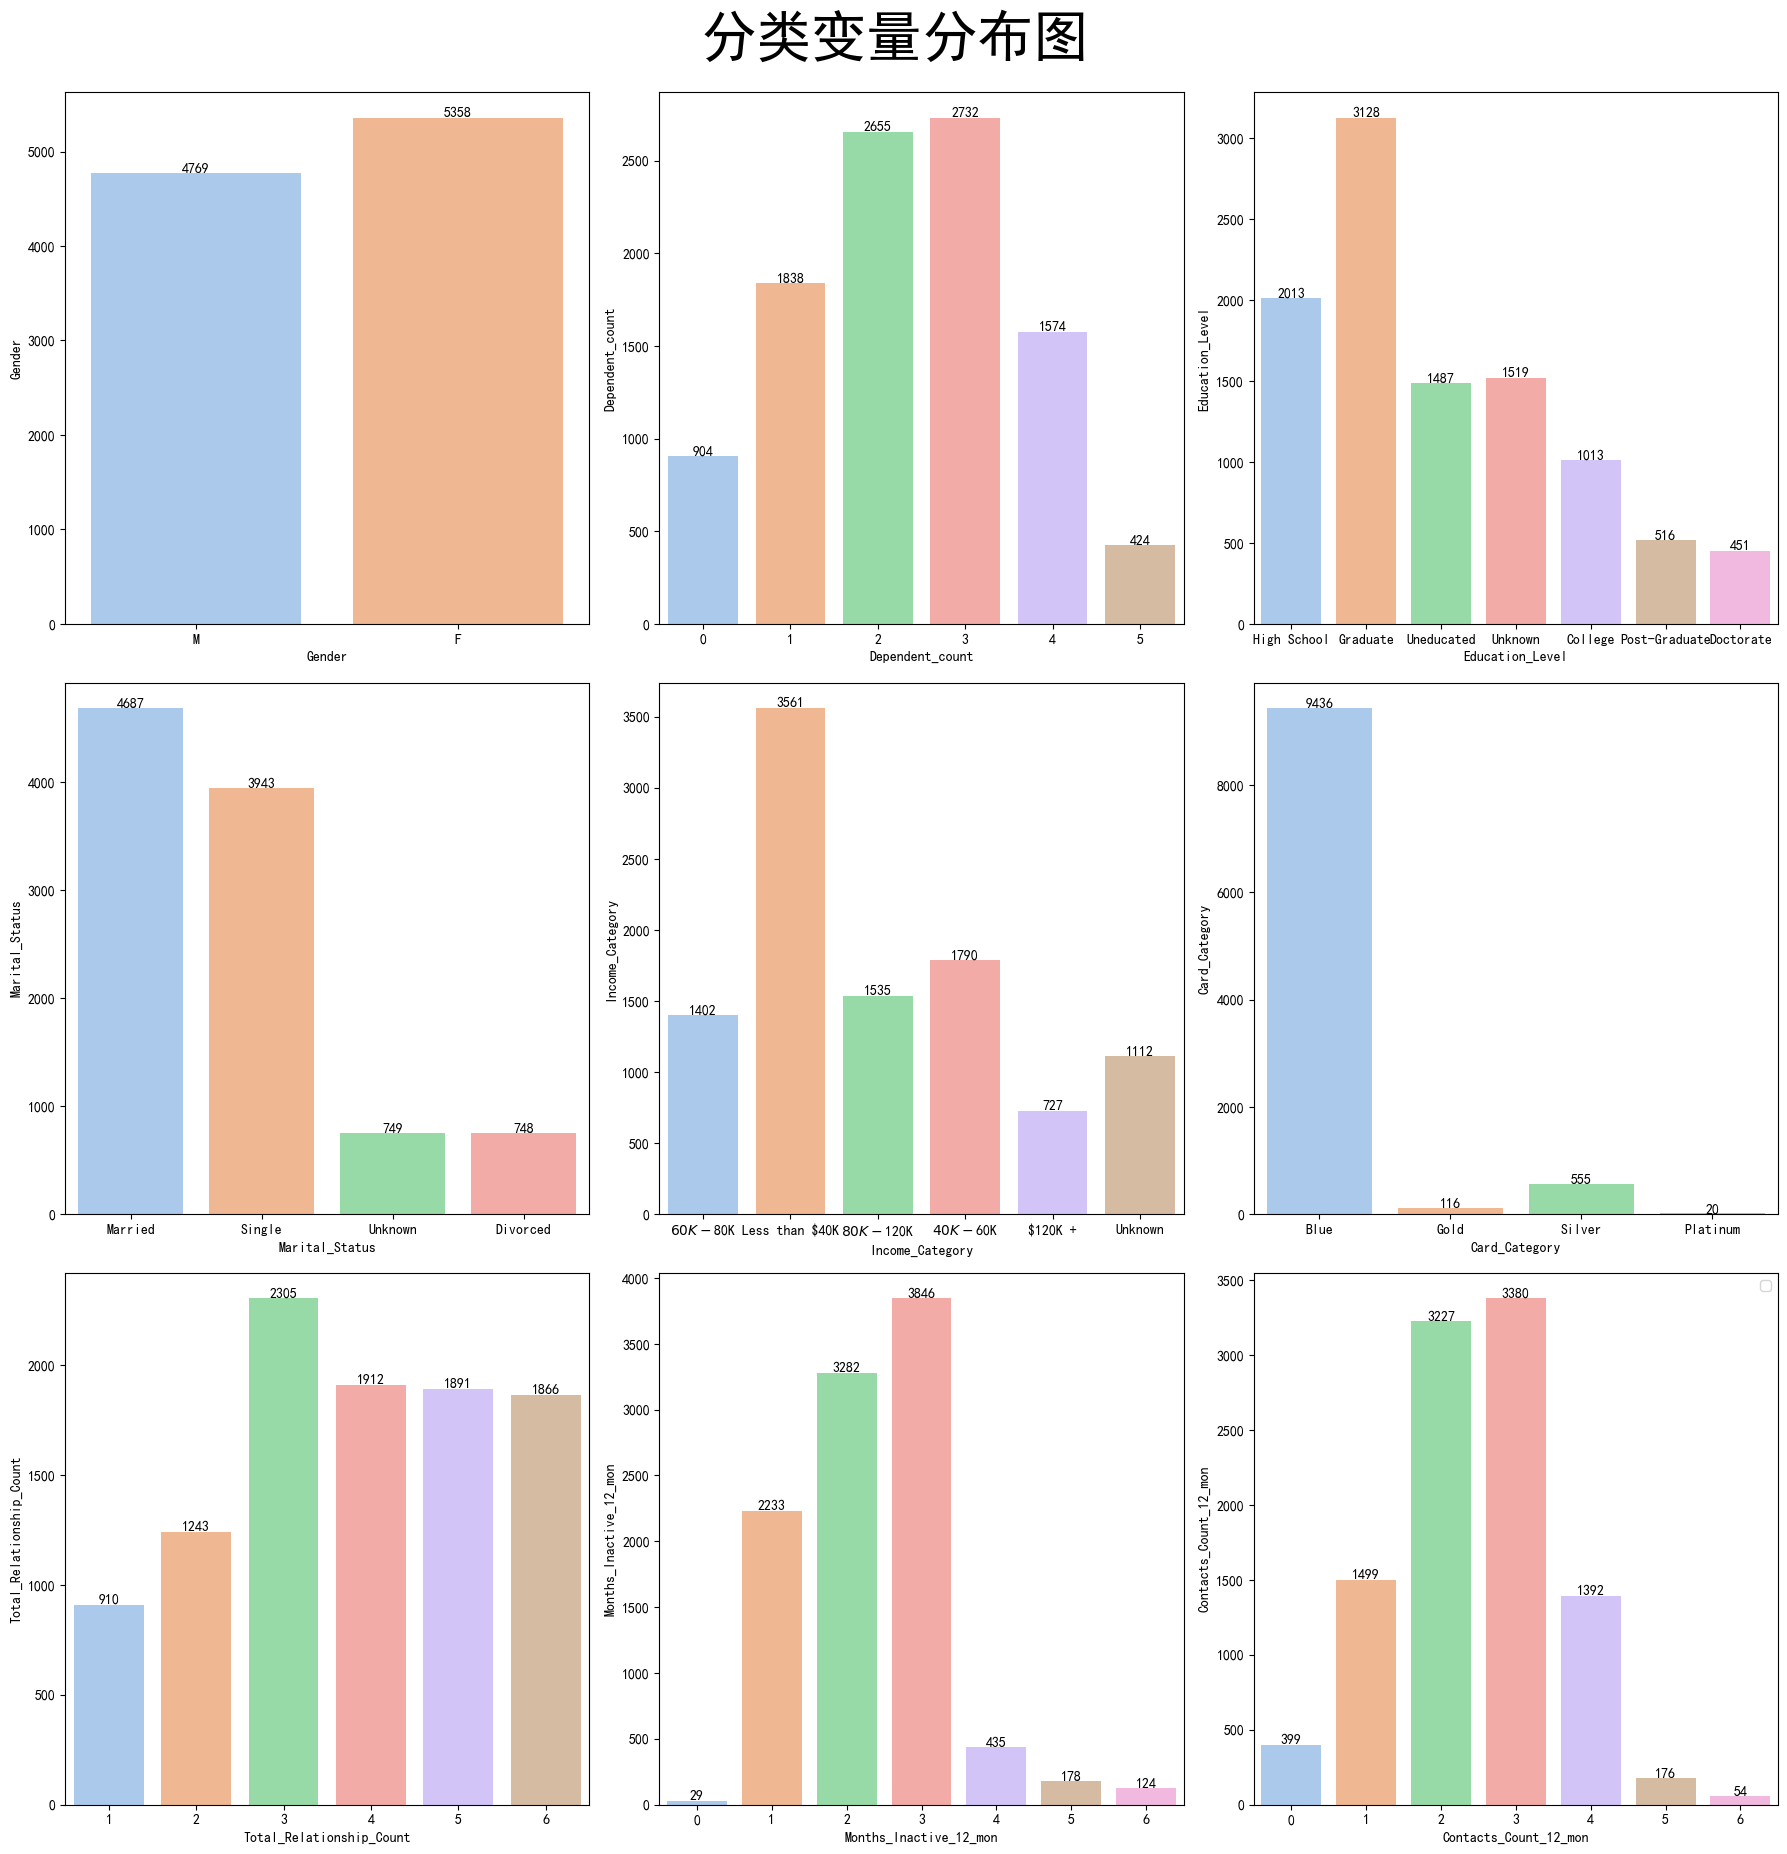

In [10]:
plt.figure(figsize = (18,24))
plot_number = 1
for col in cat_col[1:]:
    if plot_number <= len(cat_col)-1:
        ax = plt.subplot(4, 3, plot_number)
        sns.countplot(x = f'{col}' , data =data, palette= 'pastel')
    #添加数字
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2 ,p.get_height() + 5, f'{int(p.get_height())}'
                   ,ha="center")
        plt.xlabel(col)
        plt.ylabel(col)
        plot_number += 1
plt.suptitle('分类变量分布图', fontsize=40, y=1)
plt.legend()
plt.tight_layout()
plt.show()

### 描述性分析

- **性别分布**：数据集中男生和女生相差不大，分别为4769人和5358人
- **家庭人数**：受抚养人数大多为2-3人，少部分为1个和4个
- **学历分布**：主要是高中和大学的毕业生为主，其他占比较少
- **婚姻状态**：已婚和单身为主
- **收入情况**：年收入大部分少于$40k，其次是$40K-$60K
- **卡片类型**：产品90%为蓝色卡，少部分是其他卡片
- **产品数量**：客户持有的产品数量集中分布于3-4种，少部分只有1种
- **消费行为**：过去12个月内不消费的月数，90%的样本都有1-3个月内没有消费
- **联系人数量**：过去12个月内联系人的数量大多是2-3人，少部分为1人和4人

C:\Users\79250\AppData\Local\Temp\ipykernel_14580\1248539659.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\79250\AppData\Local\Temp\ipykernel_14580\1248539659.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
c:\Users\79250\.conda\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


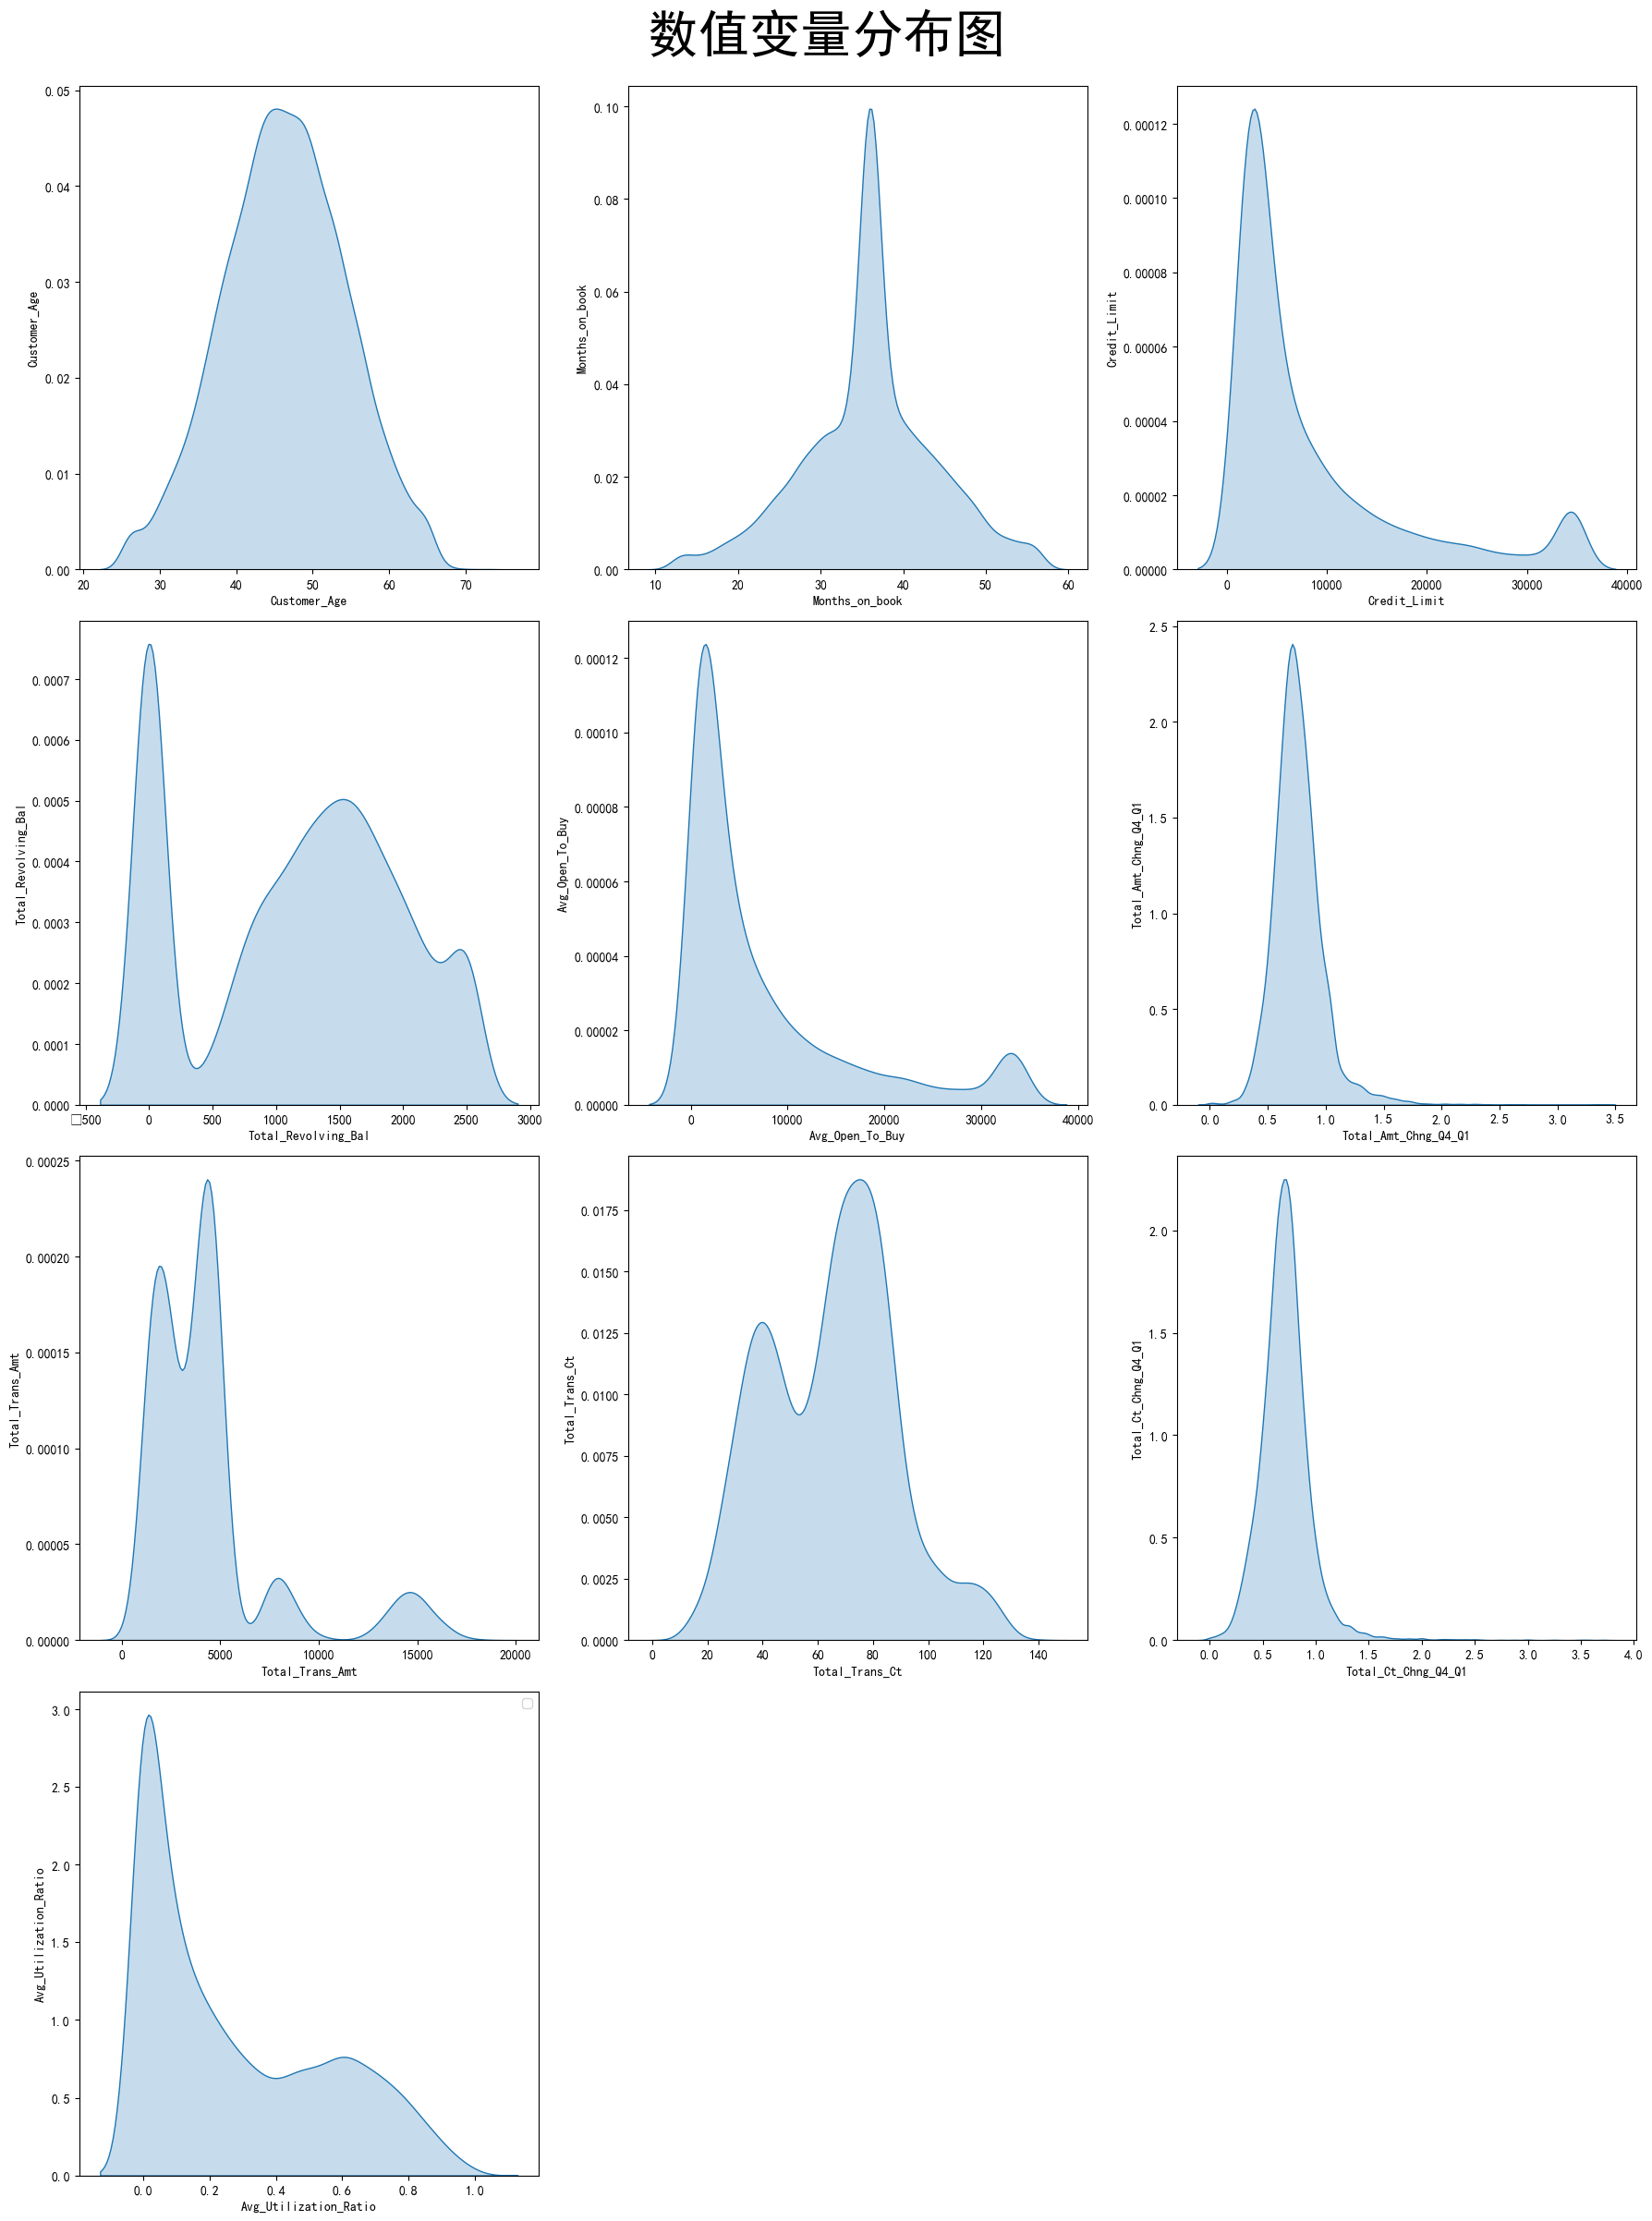

In [11]:
plt.figure(figsize = (18,24))
plot_number = 1
for col in num_col:
    if plot_number <= len(num_col):
        ax = plt.subplot(4, 3, plot_number)
        sns.kdeplot(x = f'{col}' , data =data, fill=True)
        plt.xlabel(col)
        plt.ylabel(col)
        plot_number += 1
plt.suptitle('数值变量分布图', fontsize=40, y=1)
plt.legend()
plt.tight_layout()
plt.show()

### 数值变量分布特征

- **年龄分布**：客户年龄近似正态分布，均值46岁，主要集中在35-55岁区间
- **服务时长**：客户在册月数相对均匀分布，主要集中在30-45个月
- **家庭结构**：受抚养人数右偏分布，主要为1-3人
- **信用额度**：严重右偏分布，大部分客户额度在2000-12000美元区间
- **账户余额**：双峰分布特征，大量客户余额为0或在1000-2000美元
- **可用额度**：右偏分布，与信用额度分布趋势一致
- **交易金额变化**：右偏分布，Q4相比Q1交易金额变化主要在0.5-1.0倍
- **总交易金额**：近似正态分布，主要集中在2000-5000美元
- **交易次数**：近似正态分布，主要集中在40-80次
- **交易次数变化**：右偏分布，Q4相比Q1交易次数变化主要在0.5-1.0倍
- **额度使用率**：双峰分布，大量客户使用率为0，其他主要在0.2-0.6区间

## 多变量分析

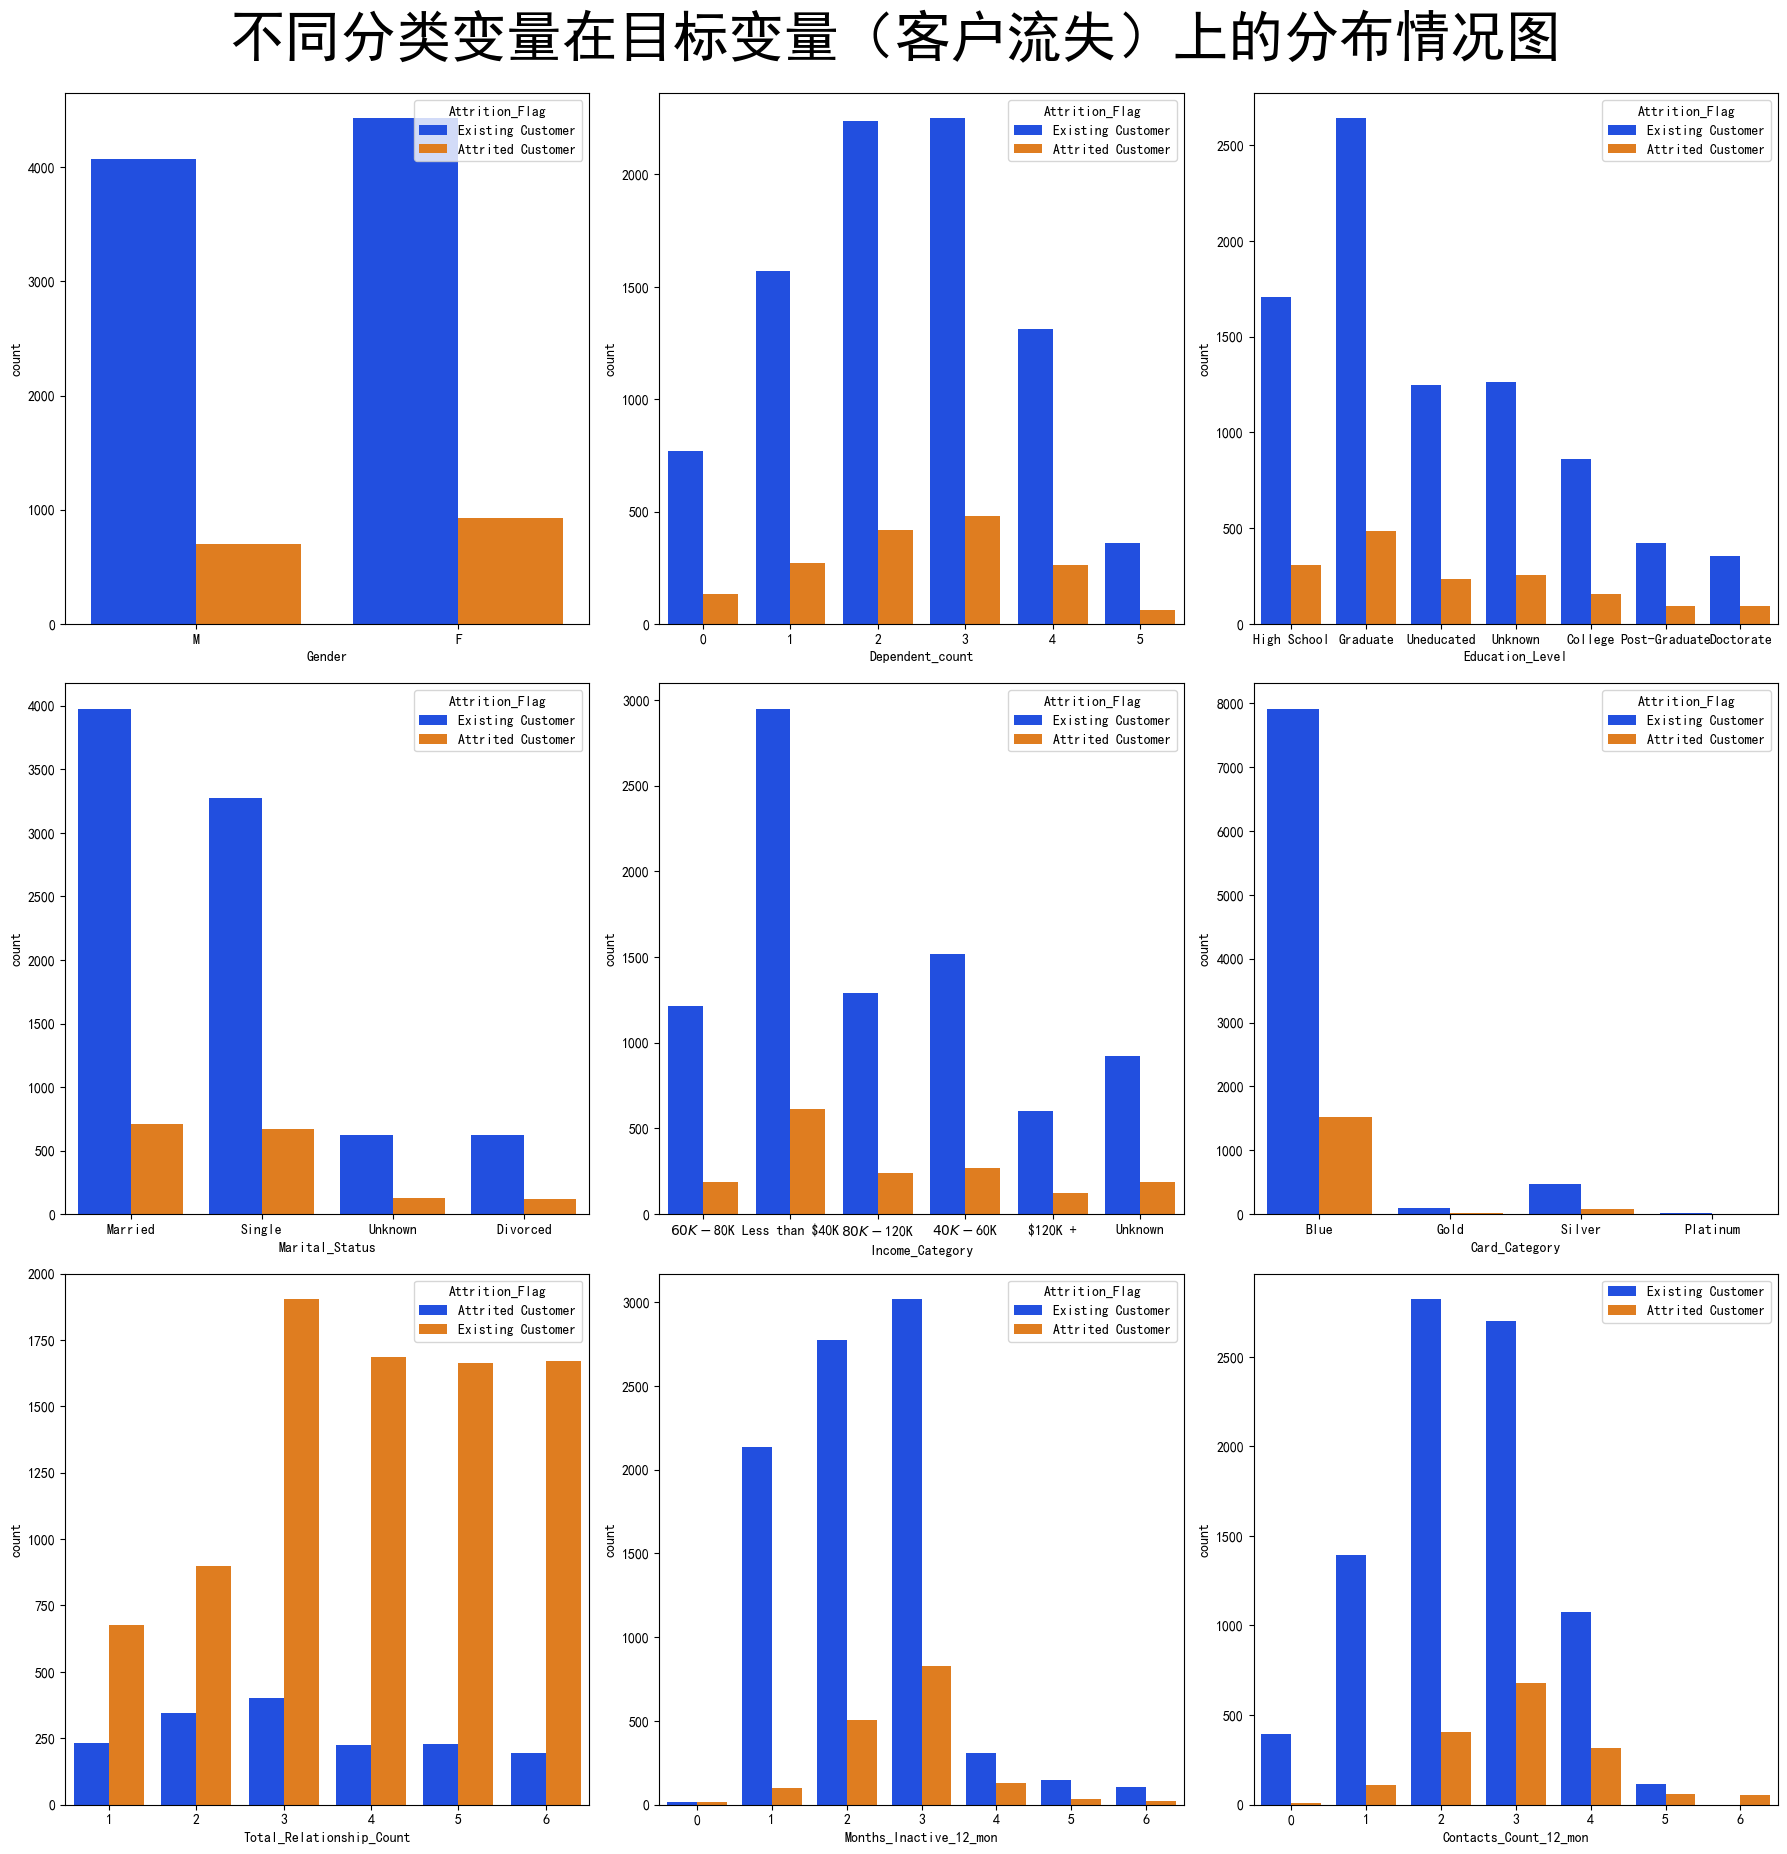

In [12]:
plt.figure(figsize = (18,24))
plotnumber = 1
for col in cat_col[1:]:
    if plotnumber <= len(cat_col[1:]):
        # 创建画布
        ax = plt.subplot(4,3,plotnumber)
        # 放进数据,进行画图
        sns.countplot(x=data[col] , hue=data['Attrition_Flag'], palette= 'bright')
    plotnumber += 1
plt.suptitle('不同分类变量在目标变量（客户流失）上的分布情况图',fontsize=40, y=1)
plt.tight_layout()
plt.legend()
plt.show()

###  不同分类变量在目标变量（客户流失）上的分布情况
- **性别** 不存在明显差异
- **受抚养人数** 流失客户中受抚养人数为3人的比例相对较高
- **教育水平** 大学毕业生的流失率相对较高
- **婚姻状况** 未知婚姻状况的客户流失率相对较高
- **收入类别** 收入较低（少于$40K）的客户流失率较高
- **卡片类别** 蓝色卡片客户流失率明显较高
- **关系数量** 持有3-4种产品的客户流失率相对较高
- **非活跃月数** 3-4个月非活跃的客户流失率较高
- 联系人数量** 联系人数量为2-3人的客户流失率相对较高

C:\Users\79250\AppData\Local\Temp\ipykernel_14580\2758070671.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\79250\AppData\Local\Temp\ipykernel_14580\2758070671.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
c:\Users\79250\.conda\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


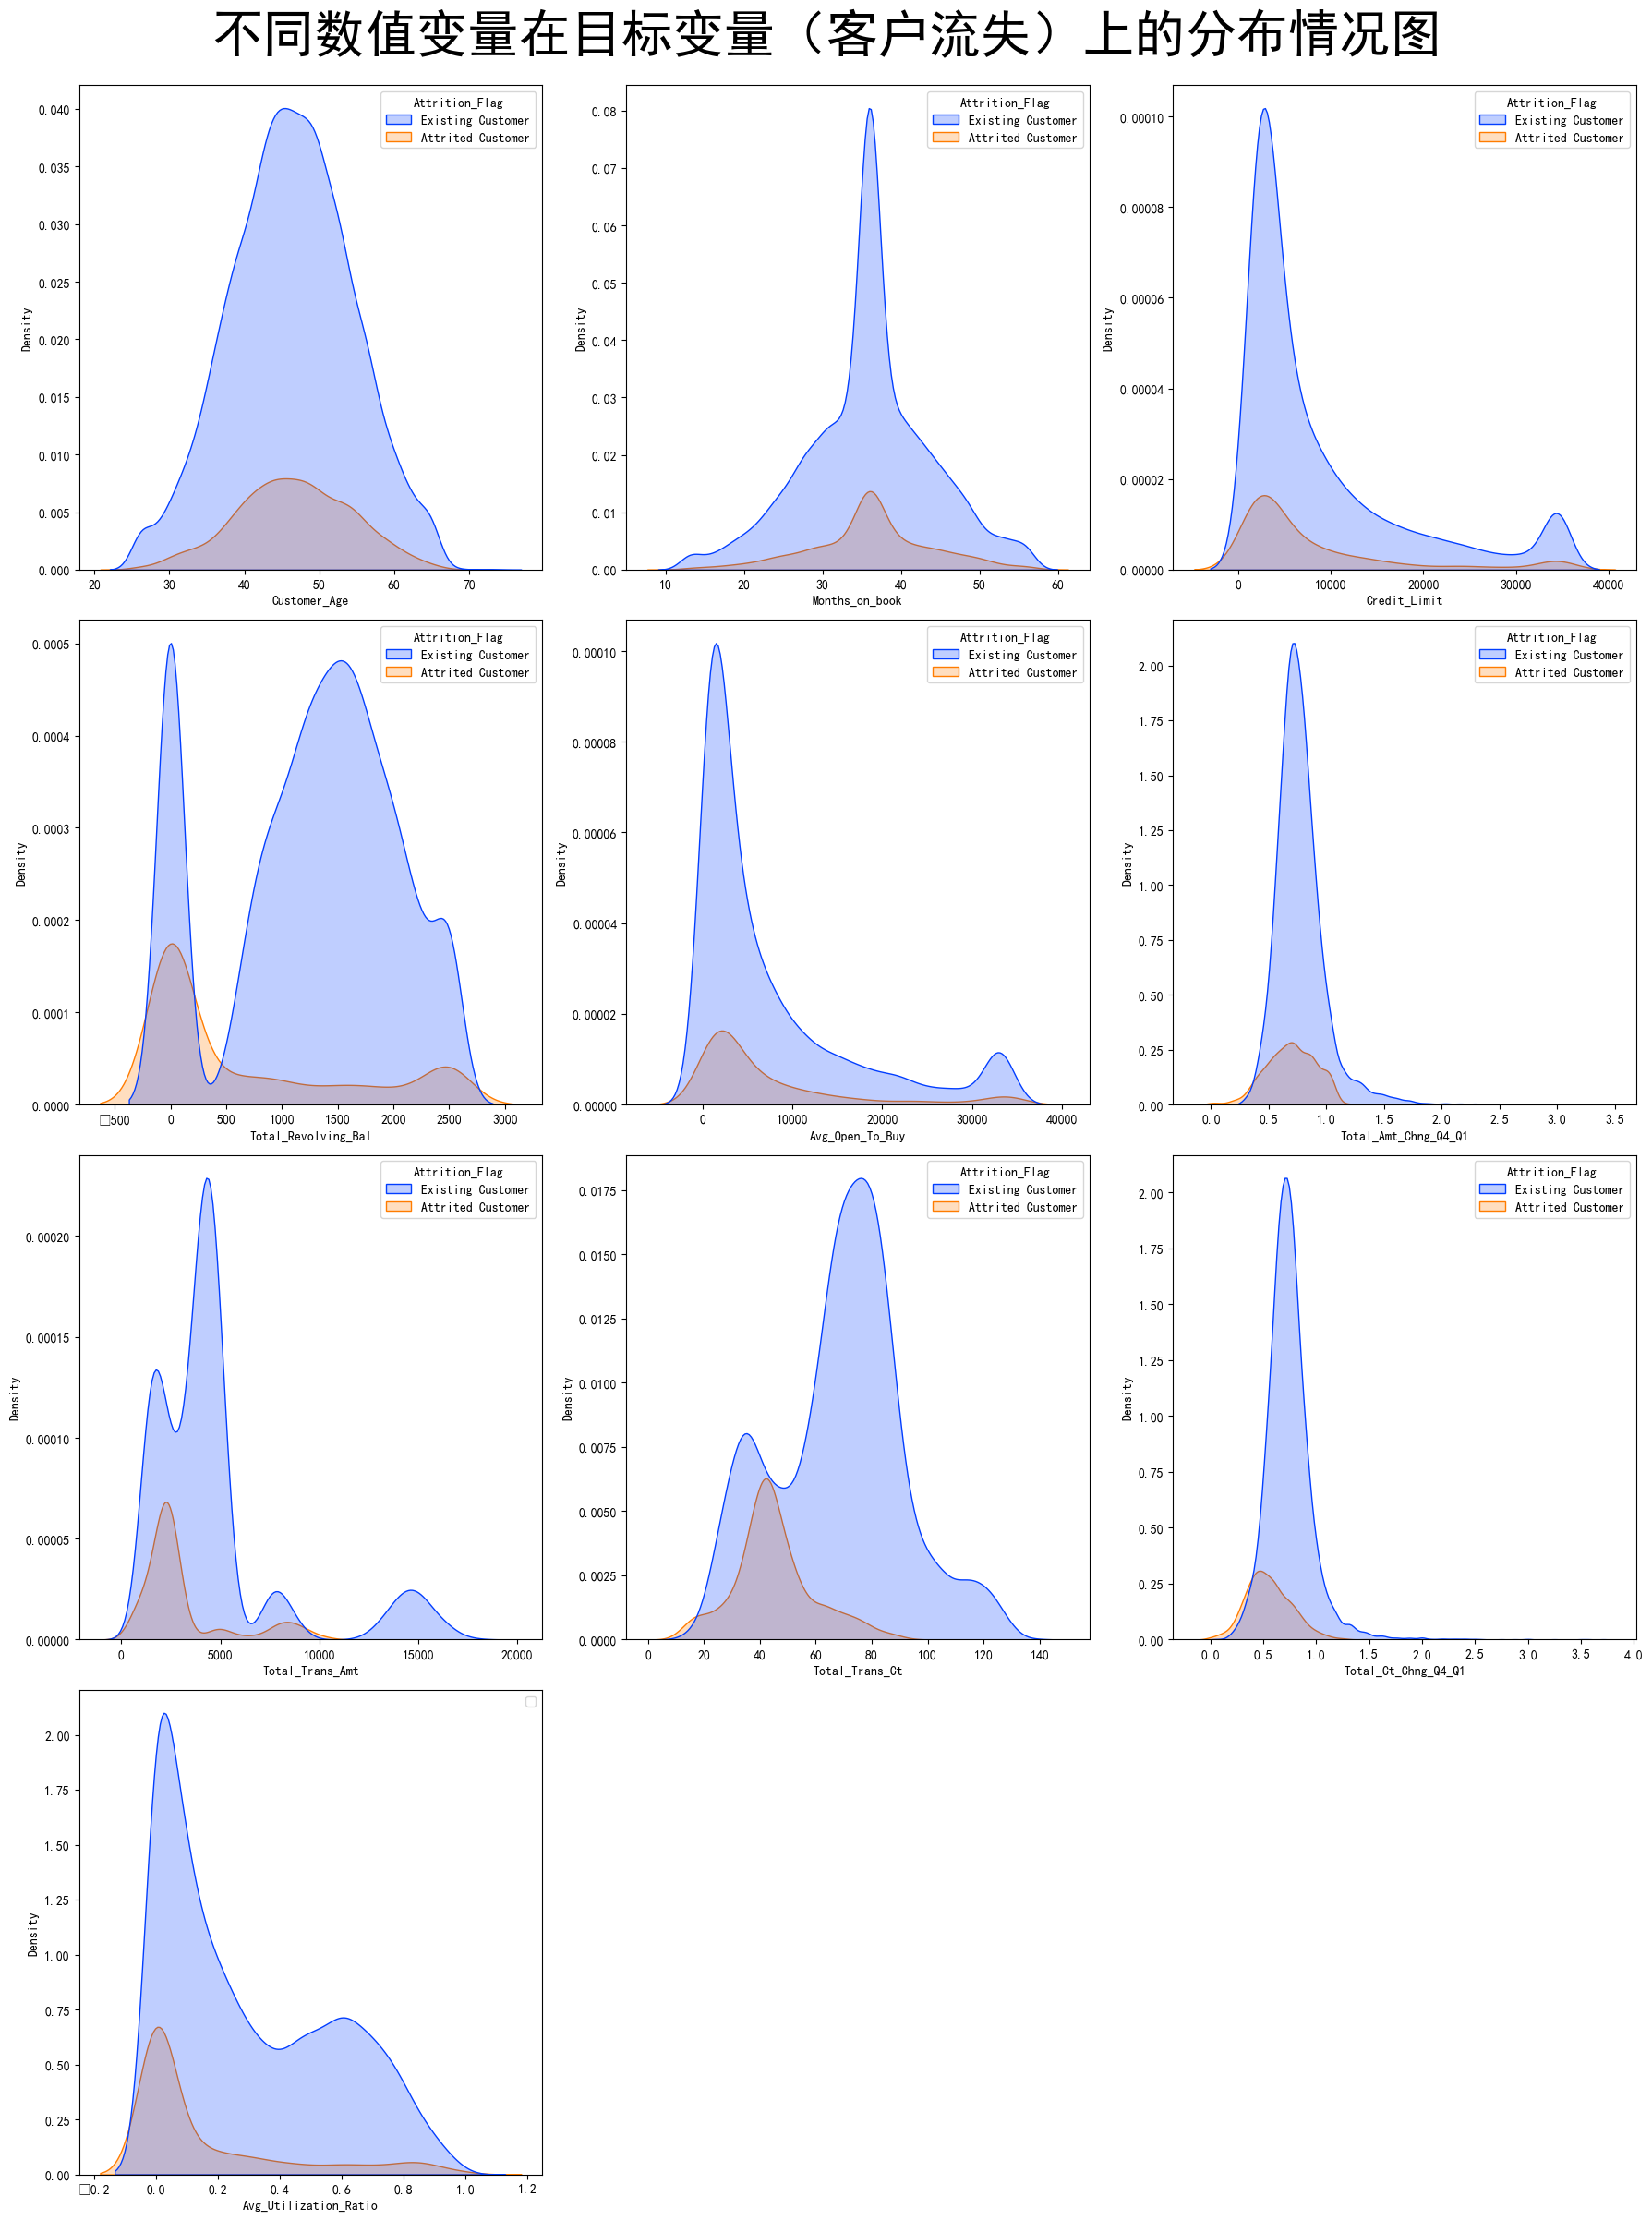

In [13]:
plt.figure(figsize = (18,24))
plotnumber = 1
for col in num_col:
    if plotnumber <= len(num_col):
        # 创建画布
        ax = plt.subplot(4,3,plotnumber)
        # 放进数据,进行画图
        sns.kdeplot(x=data[col] , hue=data['Attrition_Flag'], palette= 'bright', fill=True)
    plotnumber += 1
plt.suptitle('不同数值变量在目标变量（客户流失）上的分布情况图',fontsize=40, y=1)
plt.tight_layout()
plt.legend()
plt.show()

### 不同数值变量在目标变量（客户流失）上的分布情况
- **客户年龄**
	- 现有客户（蓝色曲线）：年龄分布较为均匀，峰值在40岁左右。
	- 流失客户（橙色曲线）：年龄分布相对更年轻，峰值在30岁左右，表明年轻客户更容易流失。
- **账户存在月数**
	- 现有客户（蓝色曲线）：账户存在月数分布较广，峰值在30个月左右。
	- 流失客户（橙色曲线）：账户存在月数相对较短，峰值在20个月左右，表明账户存在时间较短的客户更容易流失。
- **信用额度** 
	- 现有客户（蓝色曲线）：信用额度分布较广，峰值在较低额度（约5000）和较高额度（约30000）处。
	- 流失客户（橙色曲线）：信用额度分布集中在较低额度（约5000），表明低信用额度的客户更容易流失。
- **总循环余额**
	- 现有客户（蓝色曲线）：总循环余额分布较广，峰值在较低余额（约1000）和较高余额（约20000）处。
	- 流失客户（橙色曲线）：总循环余额分布集中在较低余额（约1000），表明低循环余额的客户更容易流失。
- **平均可用额度**
	- 现有客户（蓝色曲线）：平均可用额度分布较广，峰值在较低额度（约5000）和较高额度（约30000）处。
	- 流失客户（橙色曲线）：平均可用额度分布集中在较低额度（约5000），表明低可用额度的客户更容易流失。
- **Q4与Q1总交易金额变化**
	- 现有客户（蓝色曲线）：总交易金额变化分布较广，峰值在1.0左右。
	- 流失客户（橙色曲线）：总交易金额变化分布集中在较低值（约0.5），表明交易金额变化较小的客户更容易流失。
- **总交易金额**
	- 现有客户（蓝色曲线）：总交易金额分布较广，峰值在较低金额（约2000）和较高金额（约10000）处。
	- 流失客户（橙色曲线）：总交易金额分布集中在较低金额（约2000），表明低交易金额的客户更容易流失。
- **总交易次数**
	- 现有客户（蓝色曲线）：总交易次数分布较广，峰值在较低次数（约50）和较高次数（约150）处。
	- 流失客户（橙色曲线）：总交易次数分布集中在较低次数（约50），表明低交易次数的客户更容易流失。
- **Q4与Q1总交易次数变化**
	- 现有客户（蓝色曲线）：总交易次数变化分布较广，峰值在1.0左右。
	- 流失客户（橙色曲线）：总交易次数变化分布集中在较低值（约0.5），表明交易次数变化较小的客户更容易流失。
- **平均使用率**
	- 现有客户（蓝色曲线）：平均使用率分布较广，峰值在0.4左右。
	- 流失客户（橙色曲线）：平均使用率分布集中在较低值（约0.2），表明低使用率的客户更容易流失。

In [14]:
obj_col = [i for i in data.columns if data[i].dtype == 'object']
label_data = data.copy()
ordinal_encoder = OrdinalEncoder()
label_data[obj_col] = ordinal_encoder.fit_transform(data[obj_col])

label_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45,1.0,3,3.0,1.0,2.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1.0,49,0.0,5,2.0,2.0,4.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1.0,51,1.0,3,2.0,1.0,3.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1.0,40,0.0,4,3.0,3.0,4.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1.0,40,1.0,3,5.0,1.0,2.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


c:\Users\79250\.conda\envs\kaggle\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.draw()
c:\Users\79250\.conda\envs\kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  func(*args, **kwargs)
c:\Users\79250\.conda\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


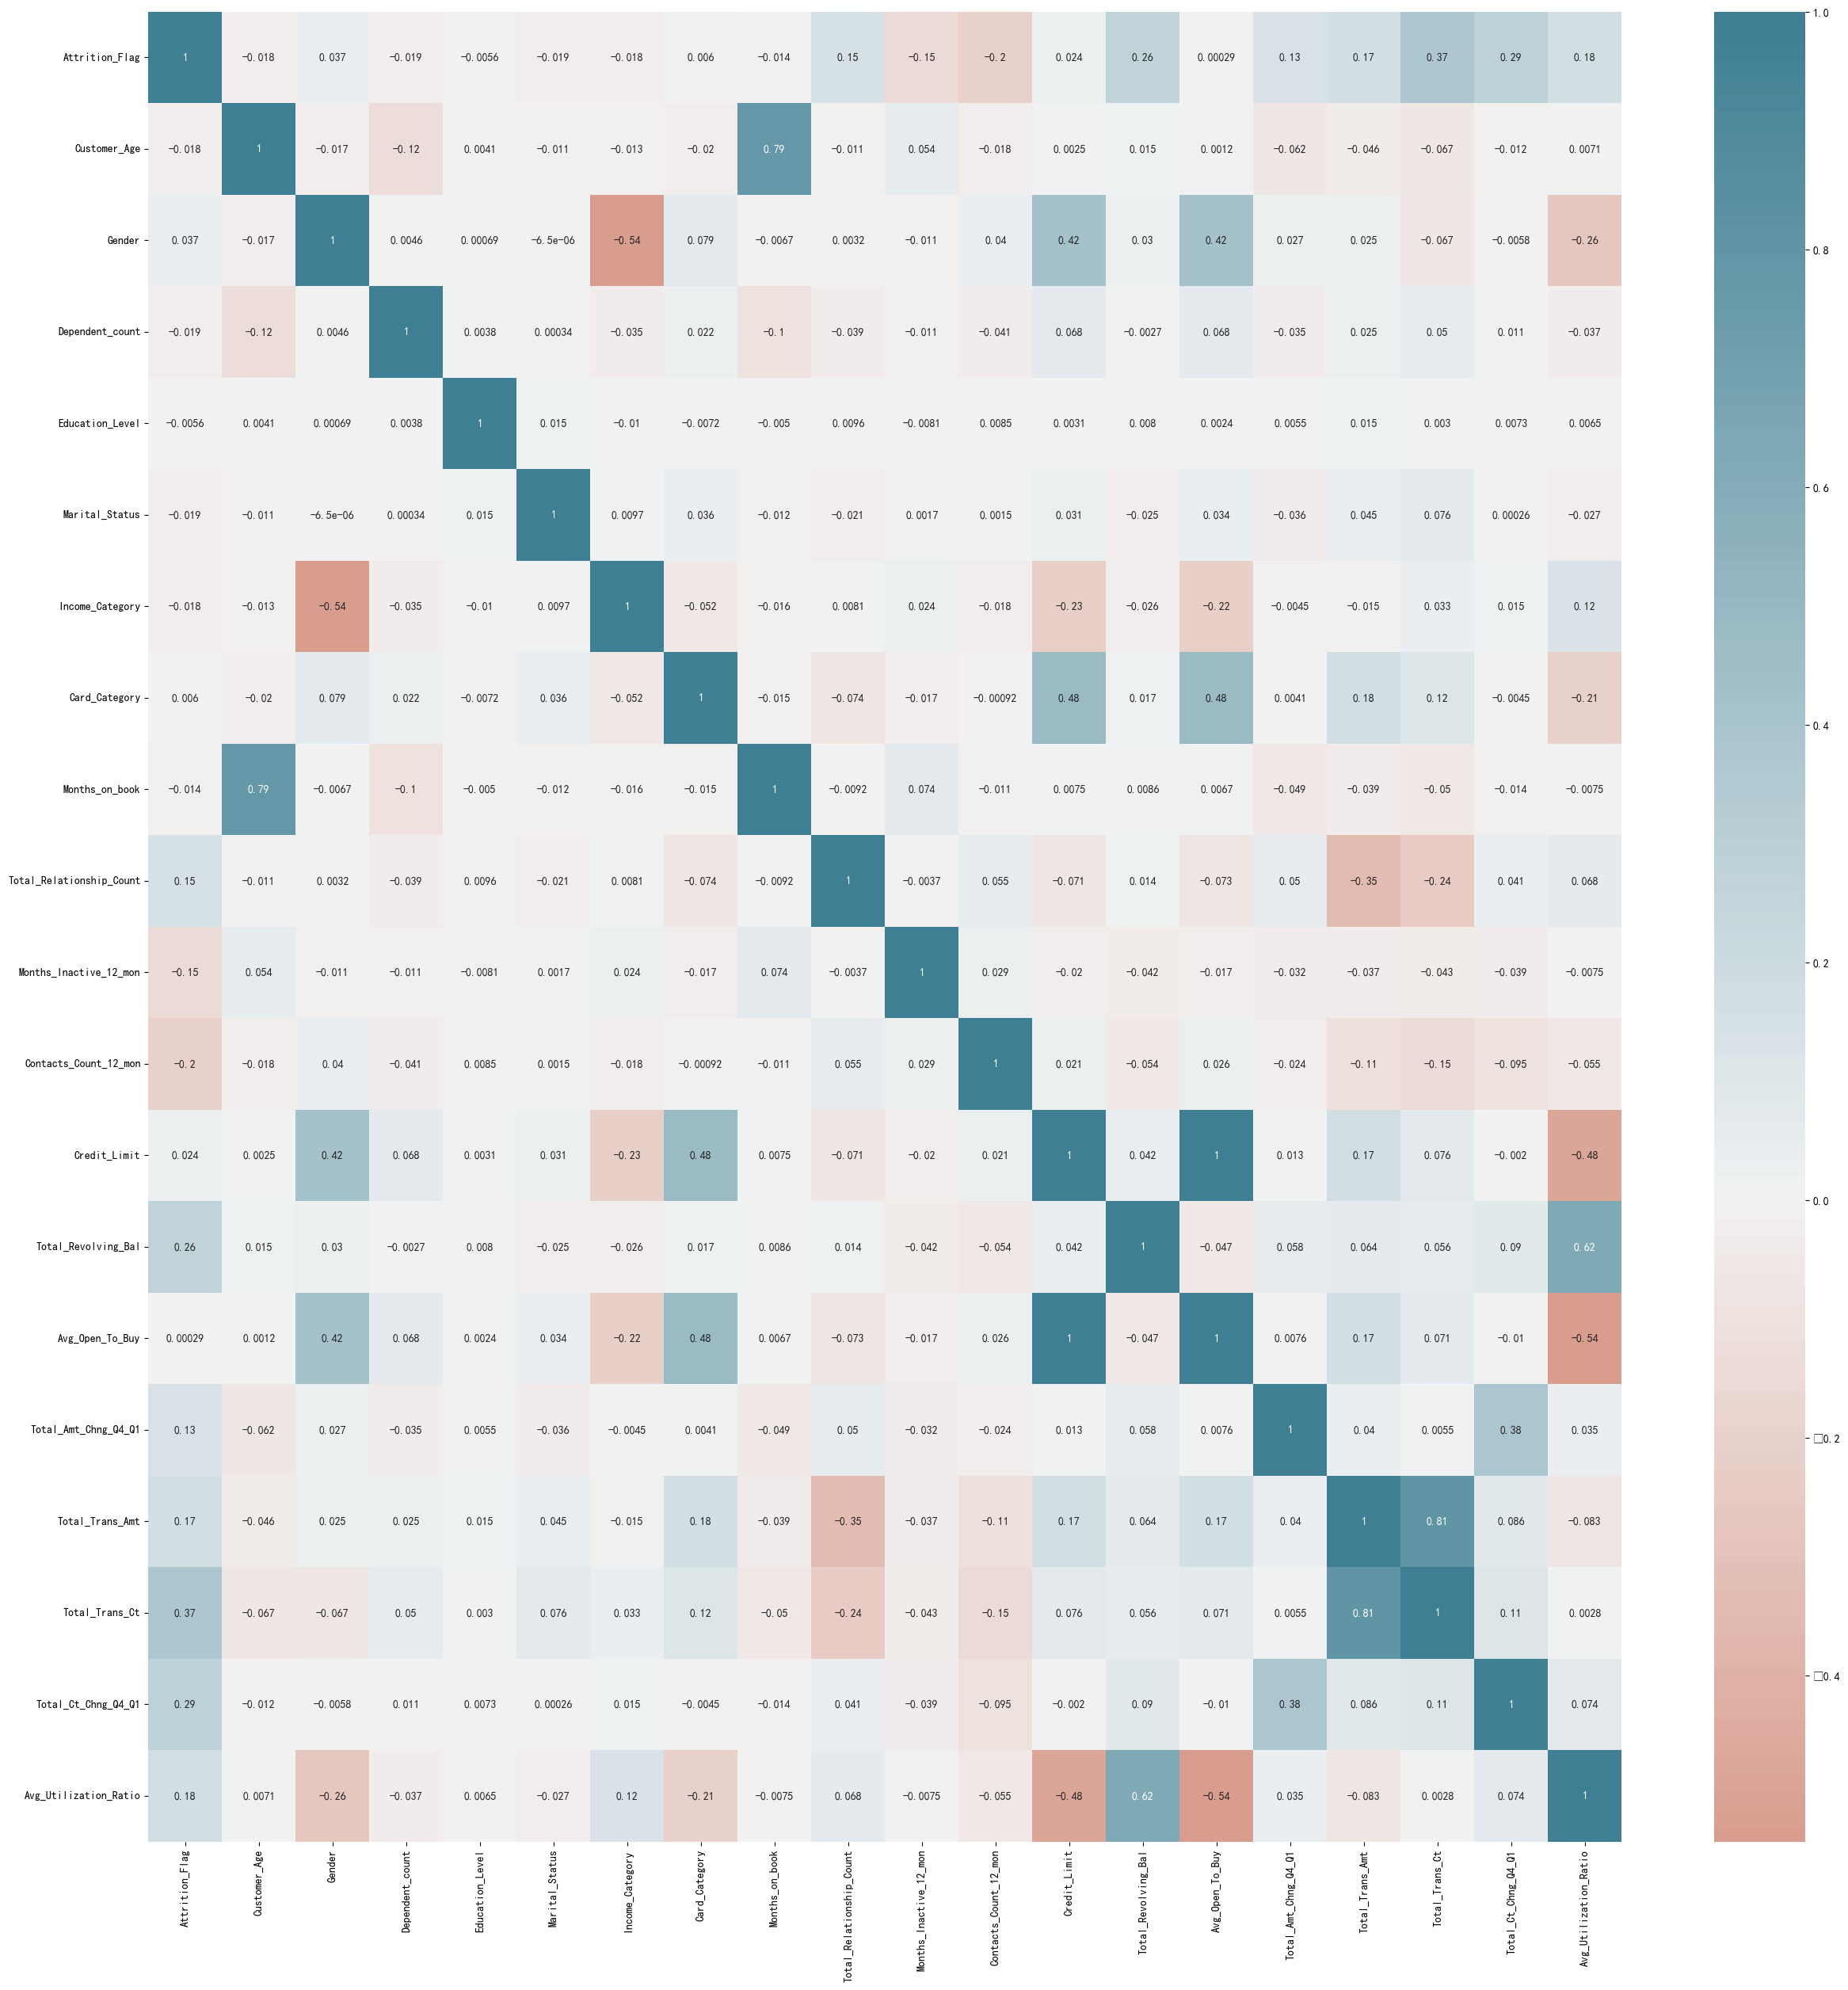

In [15]:
# 相关性分析
plt.subplots(figsize = (30,30))

sns.heatmap(label_data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True,center = 0, );


## 特征选择

In [16]:
corr = label_data.corr()
corr.sort_values(["Attrition_Flag"], ascending=False, inplace=True)
print(corr.Attrition_Flag)

Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Gender                      0.037272
Credit_Limit                0.023873
Card_Category               0.006038
Avg_Open_To_Buy             0.000285
Education_Level            -0.005551
Months_on_book             -0.013687
Income_Category            -0.017584
Customer_Age               -0.018203
Marital_Status             -0.018597
Dependent_count            -0.018991
Months_Inactive_12_mon     -0.152449
Contacts_Count_12_mon      -0.204491
Name: Attrition_Flag, dtype: float64


In [17]:
# Avg_Open_To_Buy相关性只有0.00285，直接删除
label_data = label_data.drop(columns=['Avg_Open_To_Buy'])

In [18]:
# 不平衡数据，使用欠采样
oversample = SMOTE()
X, y = oversample.fit_resample(label_data[label_data.columns[1:]], label_data[label_data.columns[0]])
usampled_df = X.assign(Churn = y)

In [19]:
usampled_df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,45,1.000000,3,3.000000,1.000000,2.000000,0.000000,39,5,1,3,12691.000000,777,1.335000,1144,42,1.625000,0.061000,1.0
1,49,0.000000,5,2.000000,2.000000,4.000000,0.000000,44,6,1,2,8256.000000,864,1.541000,1291,33,3.714000,0.105000,1.0
2,51,1.000000,3,2.000000,1.000000,3.000000,0.000000,36,4,1,0,3418.000000,0,2.594000,1887,20,2.333000,0.000000,1.0
3,40,0.000000,4,3.000000,3.000000,4.000000,0.000000,34,3,4,1,3313.000000,2517,1.405000,1171,20,2.333000,0.760000,1.0
4,40,1.000000,3,5.000000,1.000000,2.000000,0.000000,21,5,1,0,4716.000000,0,2.175000,816,28,2.500000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,53,1.000000,0,5.779514,1.955903,2.955903,0.000000,46,4,5,4,7557.079527,944,0.703400,2588,60,0.823394,0.124442,0.0
16996,47,0.698979,2,5.698979,2.000000,1.903062,0.000000,41,4,2,2,1634.270405,0,0.491934,1734,38,0.498893,0.000000,0.0
16997,44,1.000000,3,2.593615,1.864538,2.135462,2.593615,35,5,2,3,25264.350283,0,0.797254,2180,38,0.547780,0.000000,0.0
16998,45,0.737122,3,2.788635,1.262878,3.525757,0.000000,40,3,3,2,3668.589492,0,0.403478,1701,42,0.435382,0.000000,0.0


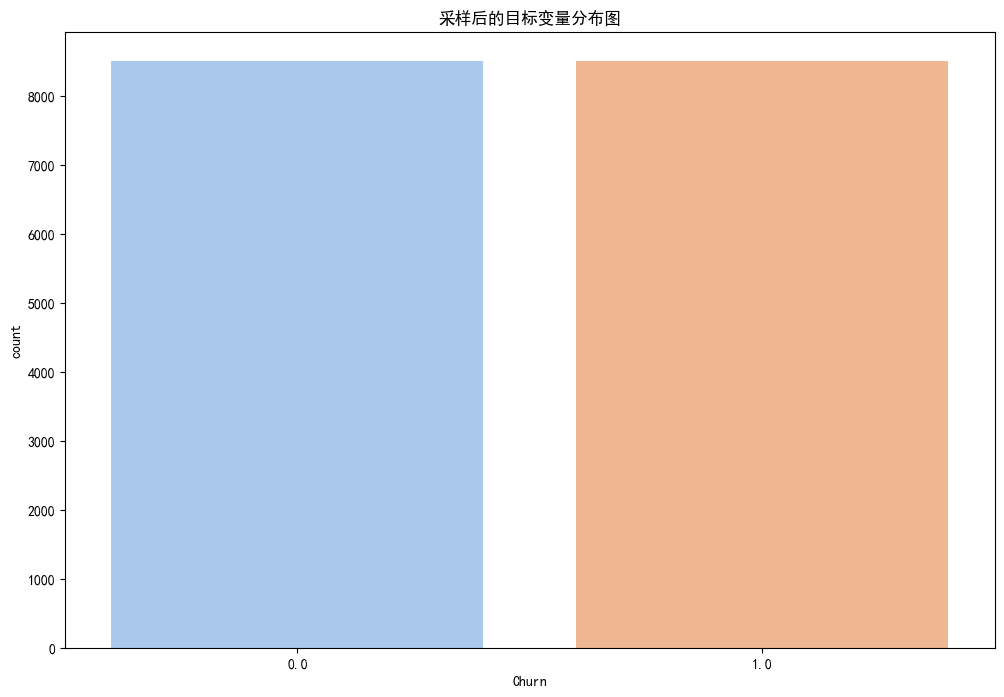

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=usampled_df, x='Churn', palette='pastel')
ax.set_title('采样后的目标变量分布图')
plt.show()

In [21]:

pca = PCA(n_components=0.95)
# 进行PCA变换
principal_components = pca.fit_transform(usampled_df)

# 将PCA结果添加回数据集中
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
usampled_df = pd.concat([usampled_df, pca_df], axis=1)

In [22]:
usampled_df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,PC1,PC2
0,45,1.000000,3,3.000000,1.000000,2.000000,0.000000,39,5,1,...,12691.000000,777,1.335000,1144,42,1.625000,0.061000,1.0,4022.116657,-3056.080828
1,49,0.000000,5,2.000000,2.000000,4.000000,0.000000,44,6,1,...,8256.000000,864,1.541000,1291,33,3.714000,0.105000,1.0,-387.734105,-2562.361725
2,51,1.000000,3,2.000000,1.000000,3.000000,0.000000,36,4,1,...,3418.000000,0,2.594000,1887,20,2.333000,0.000000,1.0,-5168.244109,-1620.370860
3,40,0.000000,4,3.000000,3.000000,4.000000,0.000000,34,3,4,...,3313.000000,2517,1.405000,1171,20,2.333000,0.760000,1.0,-5318.649809,-2245.164831
4,40,1.000000,3,5.000000,1.000000,2.000000,0.000000,21,5,1,...,4716.000000,0,2.175000,816,28,2.500000,0.000000,1.0,-3957.269303,-2788.343032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,53,1.000000,0,5.779514,1.955903,2.955903,0.000000,46,4,5,...,7557.079527,944,0.703400,2588,60,0.823394,0.124442,0.0,-983.579870,-1212.957328
16996,47,0.698979,2,5.698979,2.000000,1.903062,0.000000,41,4,2,...,1634.270405,0,0.491934,1734,38,0.498893,0.000000,0.0,-6958.447885,-1634.157654
16997,44,1.000000,3,2.593615,1.864538,2.135462,2.593615,35,5,2,...,25264.350283,0,0.797254,2180,38,0.547780,0.000000,0.0,16634.811820,-3025.344392
16998,45,0.737122,3,2.788635,1.262878,3.525757,0.000000,40,3,3,...,3668.589492,0,0.403478,1701,42,0.435382,0.000000,0.0,-4932.837383,-1825.043327


In [23]:

target = 'Churn'

# 分离特征和目标变量
X = usampled_df[['PC1', 'PC2', 'Total_Trans_Ct', 'Contacts_Count_12_mon', 'Total_Ct_Chng_Q4_Q1']]
y = usampled_df[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# 初始化评估指标字典
score = {}
predictions = {}

# XGBoost 模型
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 计算评估指标
score['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_xgb),

}
predictions['XGBoost'] = (y_pred_xgb, y_pred_proba_xgb)

# LightGBM 模型
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# 计算评估指标
score['LightGBM'] = {
    'accuracy': accuracy_score(y_test, y_pred_lgb),
    'precision': precision_score(y_test, y_pred_lgb),
    'recall': recall_score(y_test, y_pred_lgb),
    'f1': f1_score(y_test, y_pred_lgb),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_lgb),

}
predictions['LightGBM'] = (y_pred_lgb, y_pred_proba_lgb)

[LightGBM] [Info] Number of positive: 6824, number of negative: 6776
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501765 -> initscore=0.007059
[LightGBM] [Info] Start training from score 0.007059


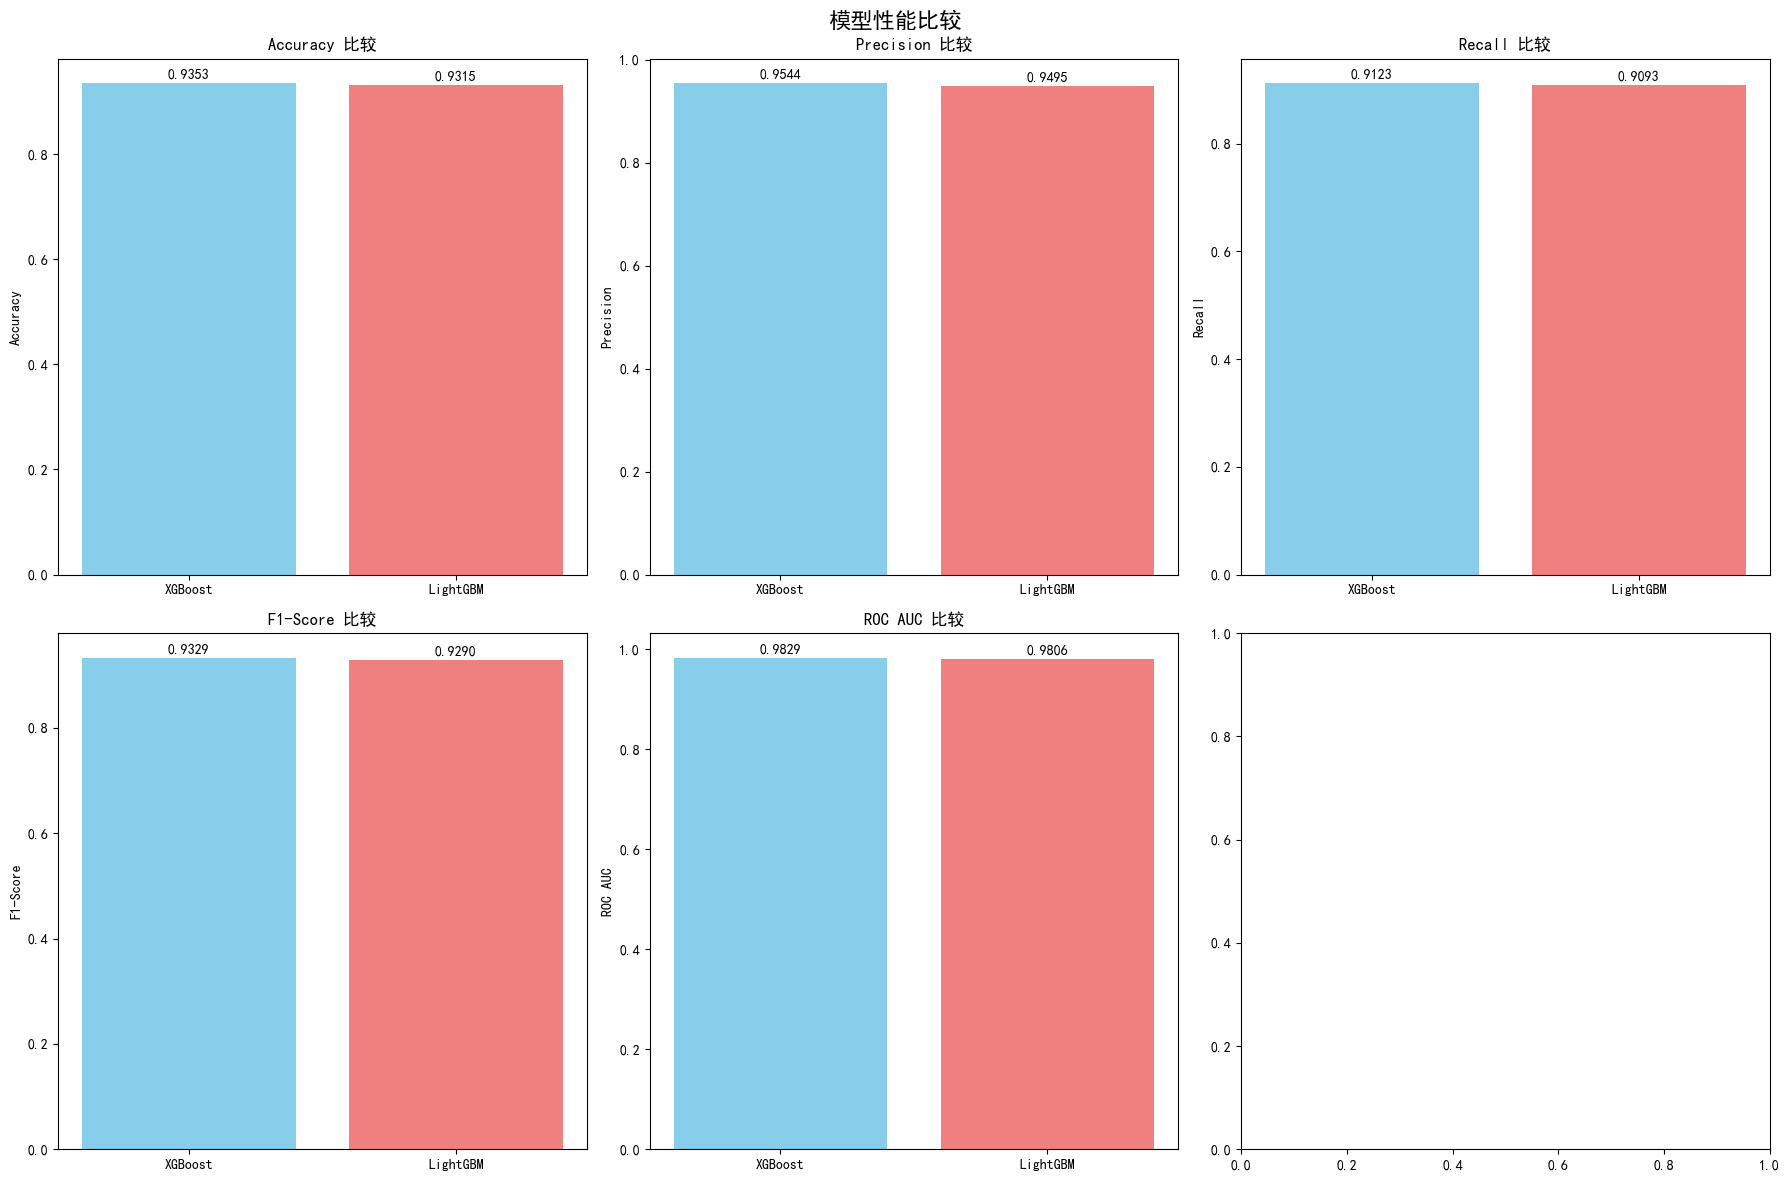

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('模型性能比较', fontsize=16)

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'rmsle']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    ax = axes[i//3, i%3]
    models = list(score.keys())
    values = [score[model][metric] for model in models]
    
    bars = ax.bar(models, values, color=['skyblue', 'lightcoral'])
    ax.set_title(f'{name} 比较')
    ax.set_ylabel(name)
    
    # 在柱状图上添加数值标签
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
                f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

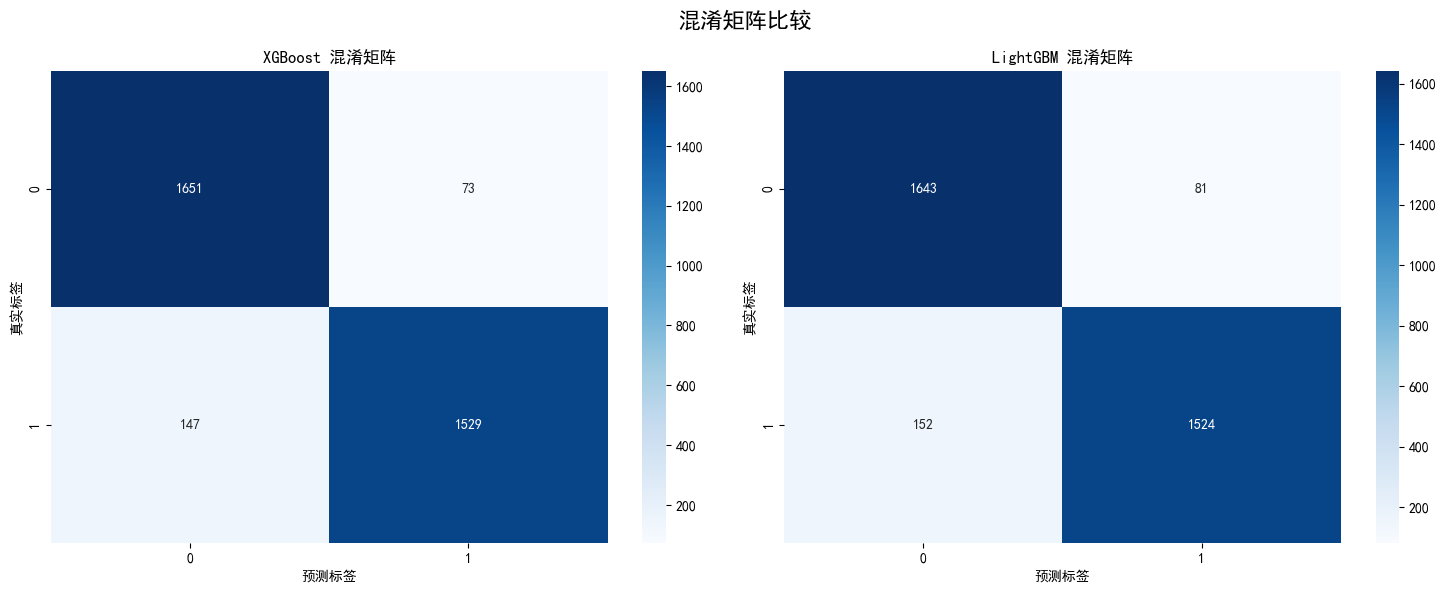

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('混淆矩阵比较', fontsize=16)

for idx, (model_name, (y_pred, _)) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{model_name} 混淆矩阵')
    axes[idx].set_xlabel('预测标签')
    axes[idx].set_ylabel('真实标签')

plt.tight_layout()
plt.show()

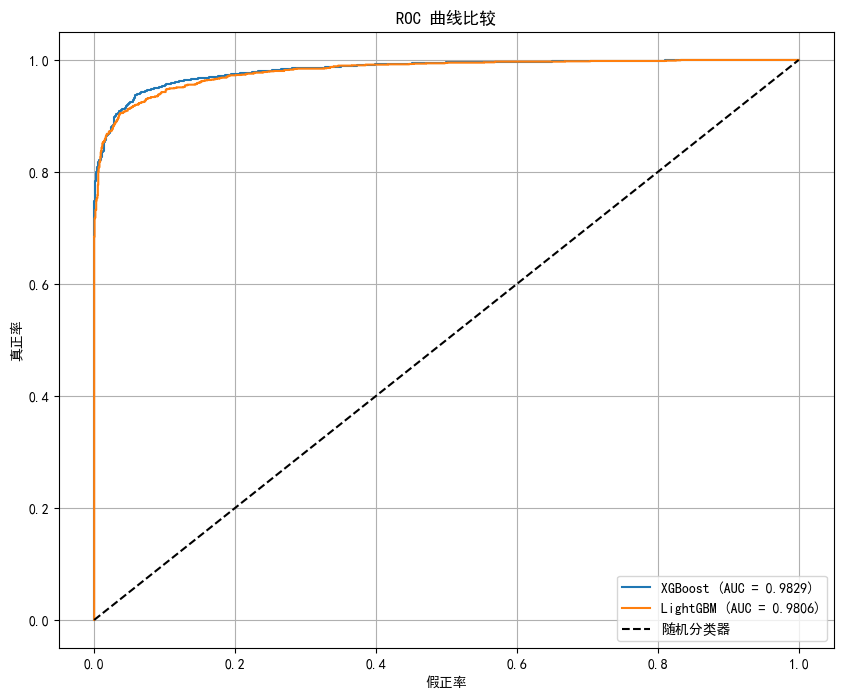

In [27]:
plt.figure(figsize=(10, 8))
for model_name, (_, y_pred_proba) in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='随机分类器')
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('ROC 曲线比较')
plt.legend()
plt.grid(True)
plt.show()

## shap解释模型

In [28]:
shap.initjs()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

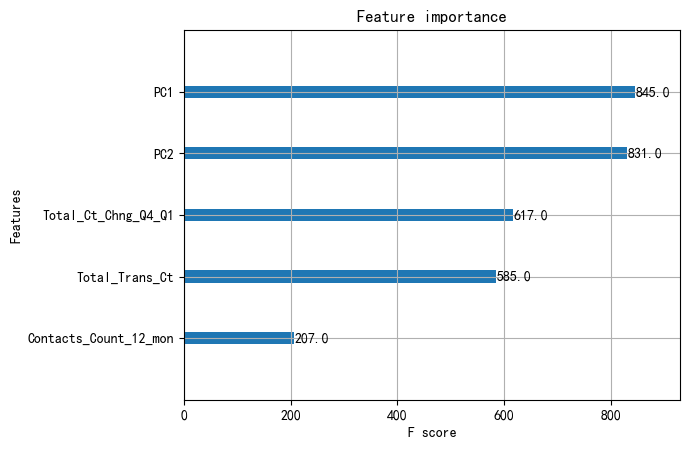

In [31]:
plot_importance(xgb_model)